# CREDIT RISK MODELLING

### LIBRARIES AND DATA IMPORT

In [1]:
# General Libraries 

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

#Data preprocessing libraries
from sklearn.preprocessing import RobustScaler
import missingno as msno


# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier 


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools
from sklearn.metrics import f1_score

In [2]:
#Loading data 
Loan = pd.read_csv("raw-data.csv")
Loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [3]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loan was taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


## BASIC EDA

In [4]:
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [5]:
Loan_renamed.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,...,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,...,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,...,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,...,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,...,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,...,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,...,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,...,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


##### The statistical summary shows:
   ##### a) Difference in range between various features hence the need for standardization
   ##### b) Presence of outliers eg in No of times bounced while repaying the loan, EMI

In [6]:
Loan_renamed.columns

Index(['Customer ID', 'Customer has bounced in first EMI',
       'No of times bounced 12 months', 'Maximum MOB',
       'No of times bounced while repaying the loan', 'EMI', 'Loan Amount',
       'Tenure',
       'Dealer codes from where customer has purchased the Two wheeler',
       'Product code of Two wheeler', 'No of advance EMI paid',
       'Rate of interest', 'Gender', 'Employment type',
       'Resident type of customer', 'Date of birth',
       'Customer age when loan was taken', 'No of loans',
       'No of secured loans', 'No of unsecured loans',
       'Max amount sanctioned in the Live loans',
       'No of new loans in last 3 months',
       'Total sanctioned amount in the secured Loans which are Live',
       'Total sanctioned amount in the unsecured Loans which are Live',
       'Maximum amount sanctioned for any Two wheeler loan',
       'Time since last Personal loan taken (in months)',
       'Time since first consumer durables loan taken (in months)',
       'No o

In [7]:
#Drop customer ID column
Loan_renamed.drop(['Customer ID'], axis=1, inplace=True)
Loan_renamed.head(2)

,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


#### Vizualization

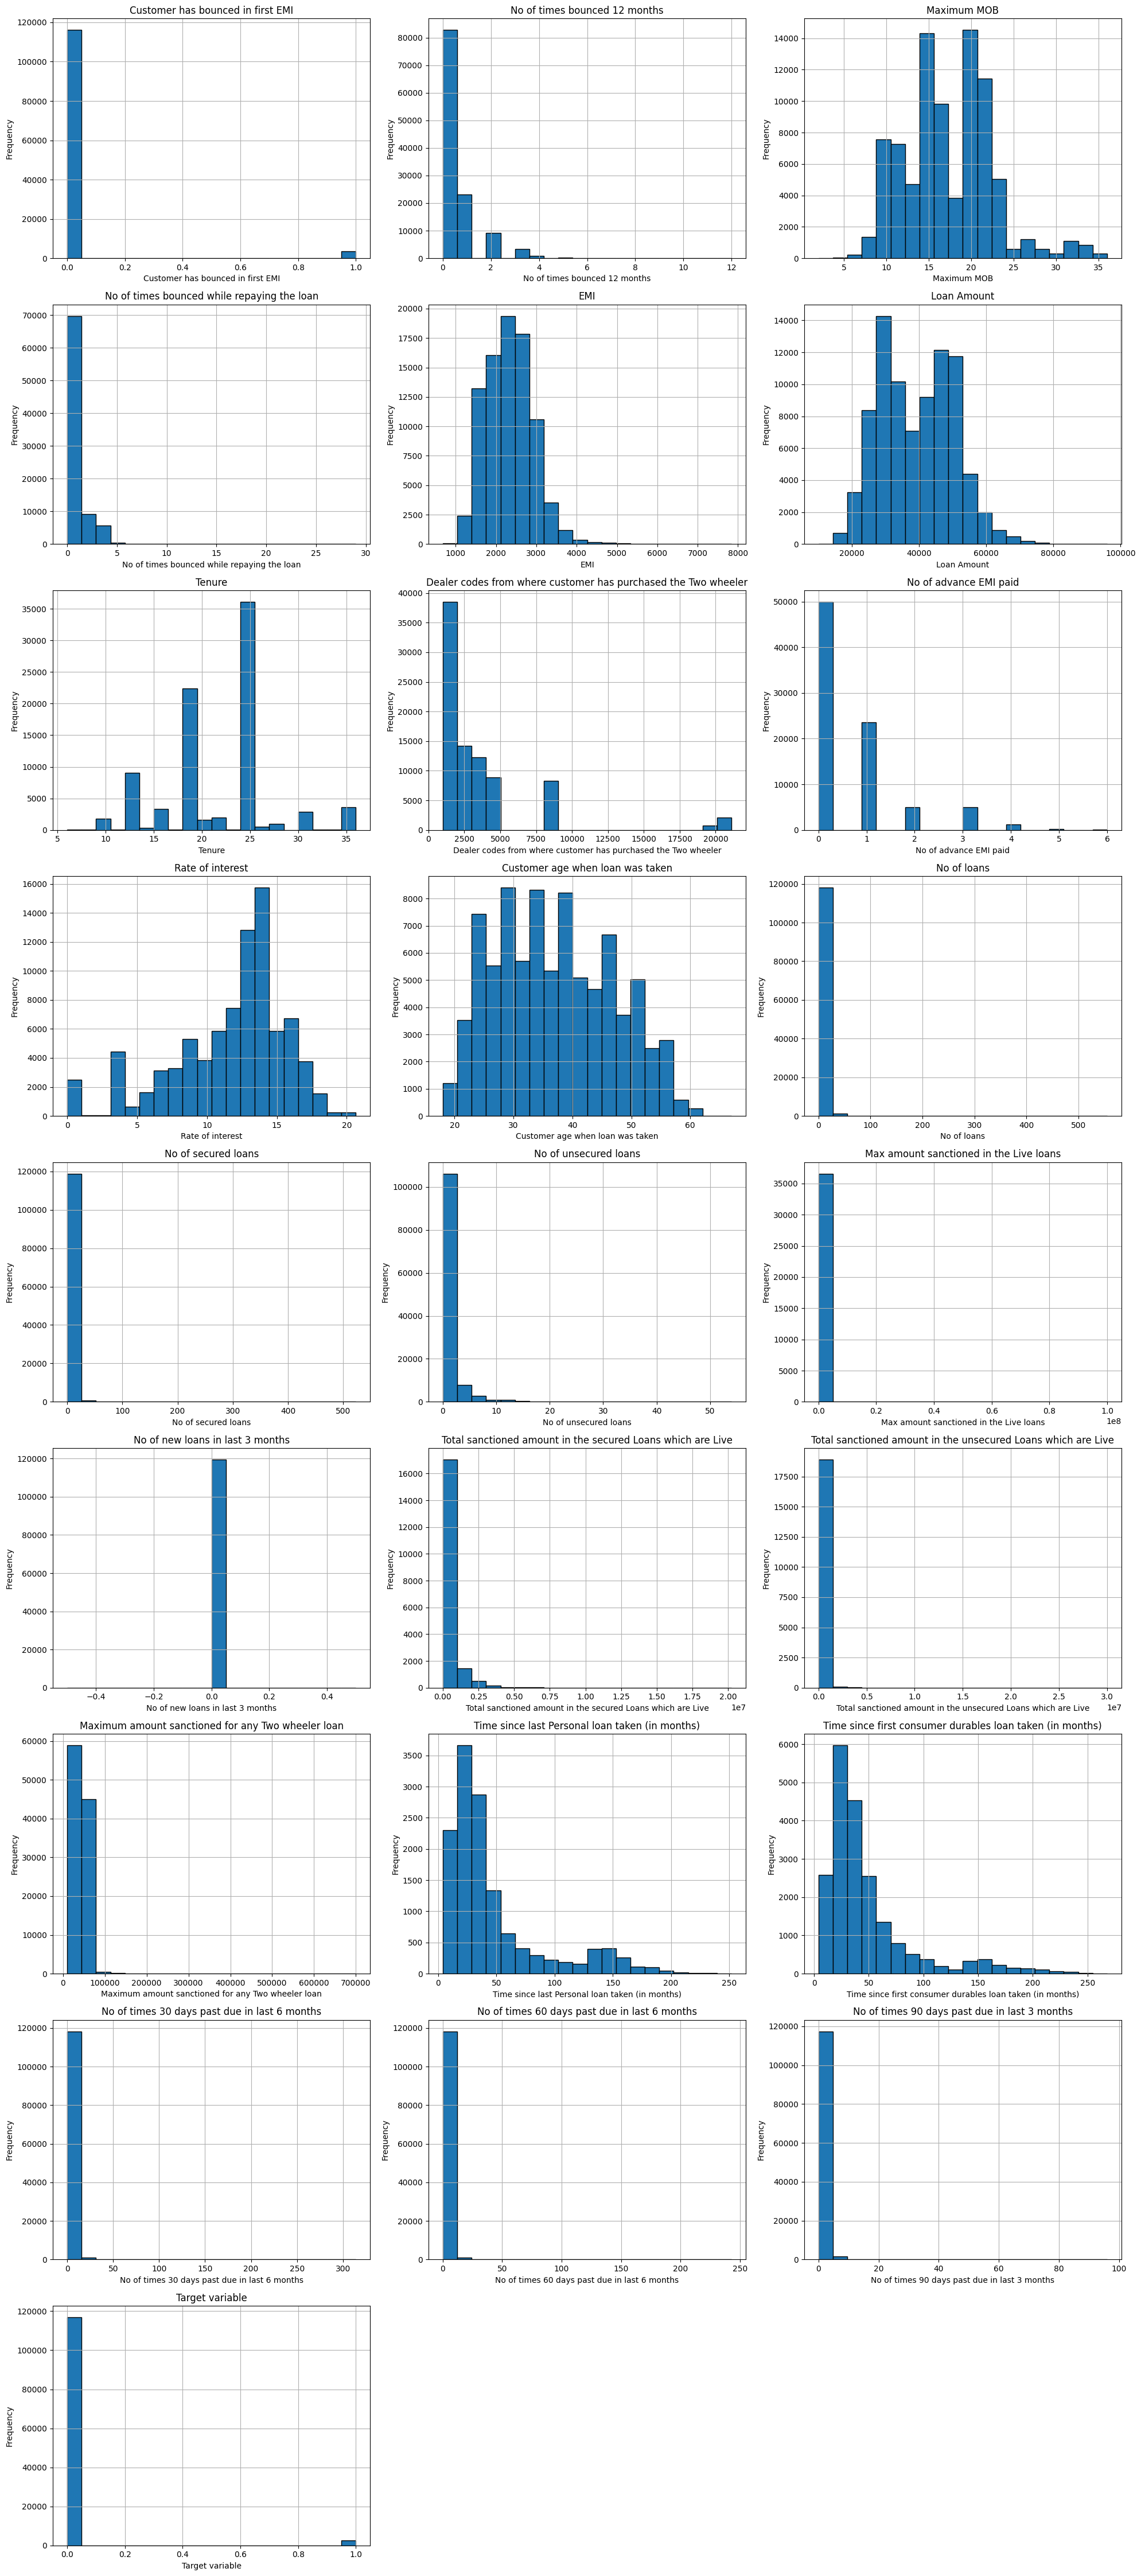

In [8]:
#Distribution

# Select numeric columns
numeric_columns = Loan_renamed.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numeric_columns) - 1) // n_cols + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
#fig.suptitle('Histograms of Numeric Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numeric_columns):
    ax = axes[i]
    Loan_renamed[col].hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

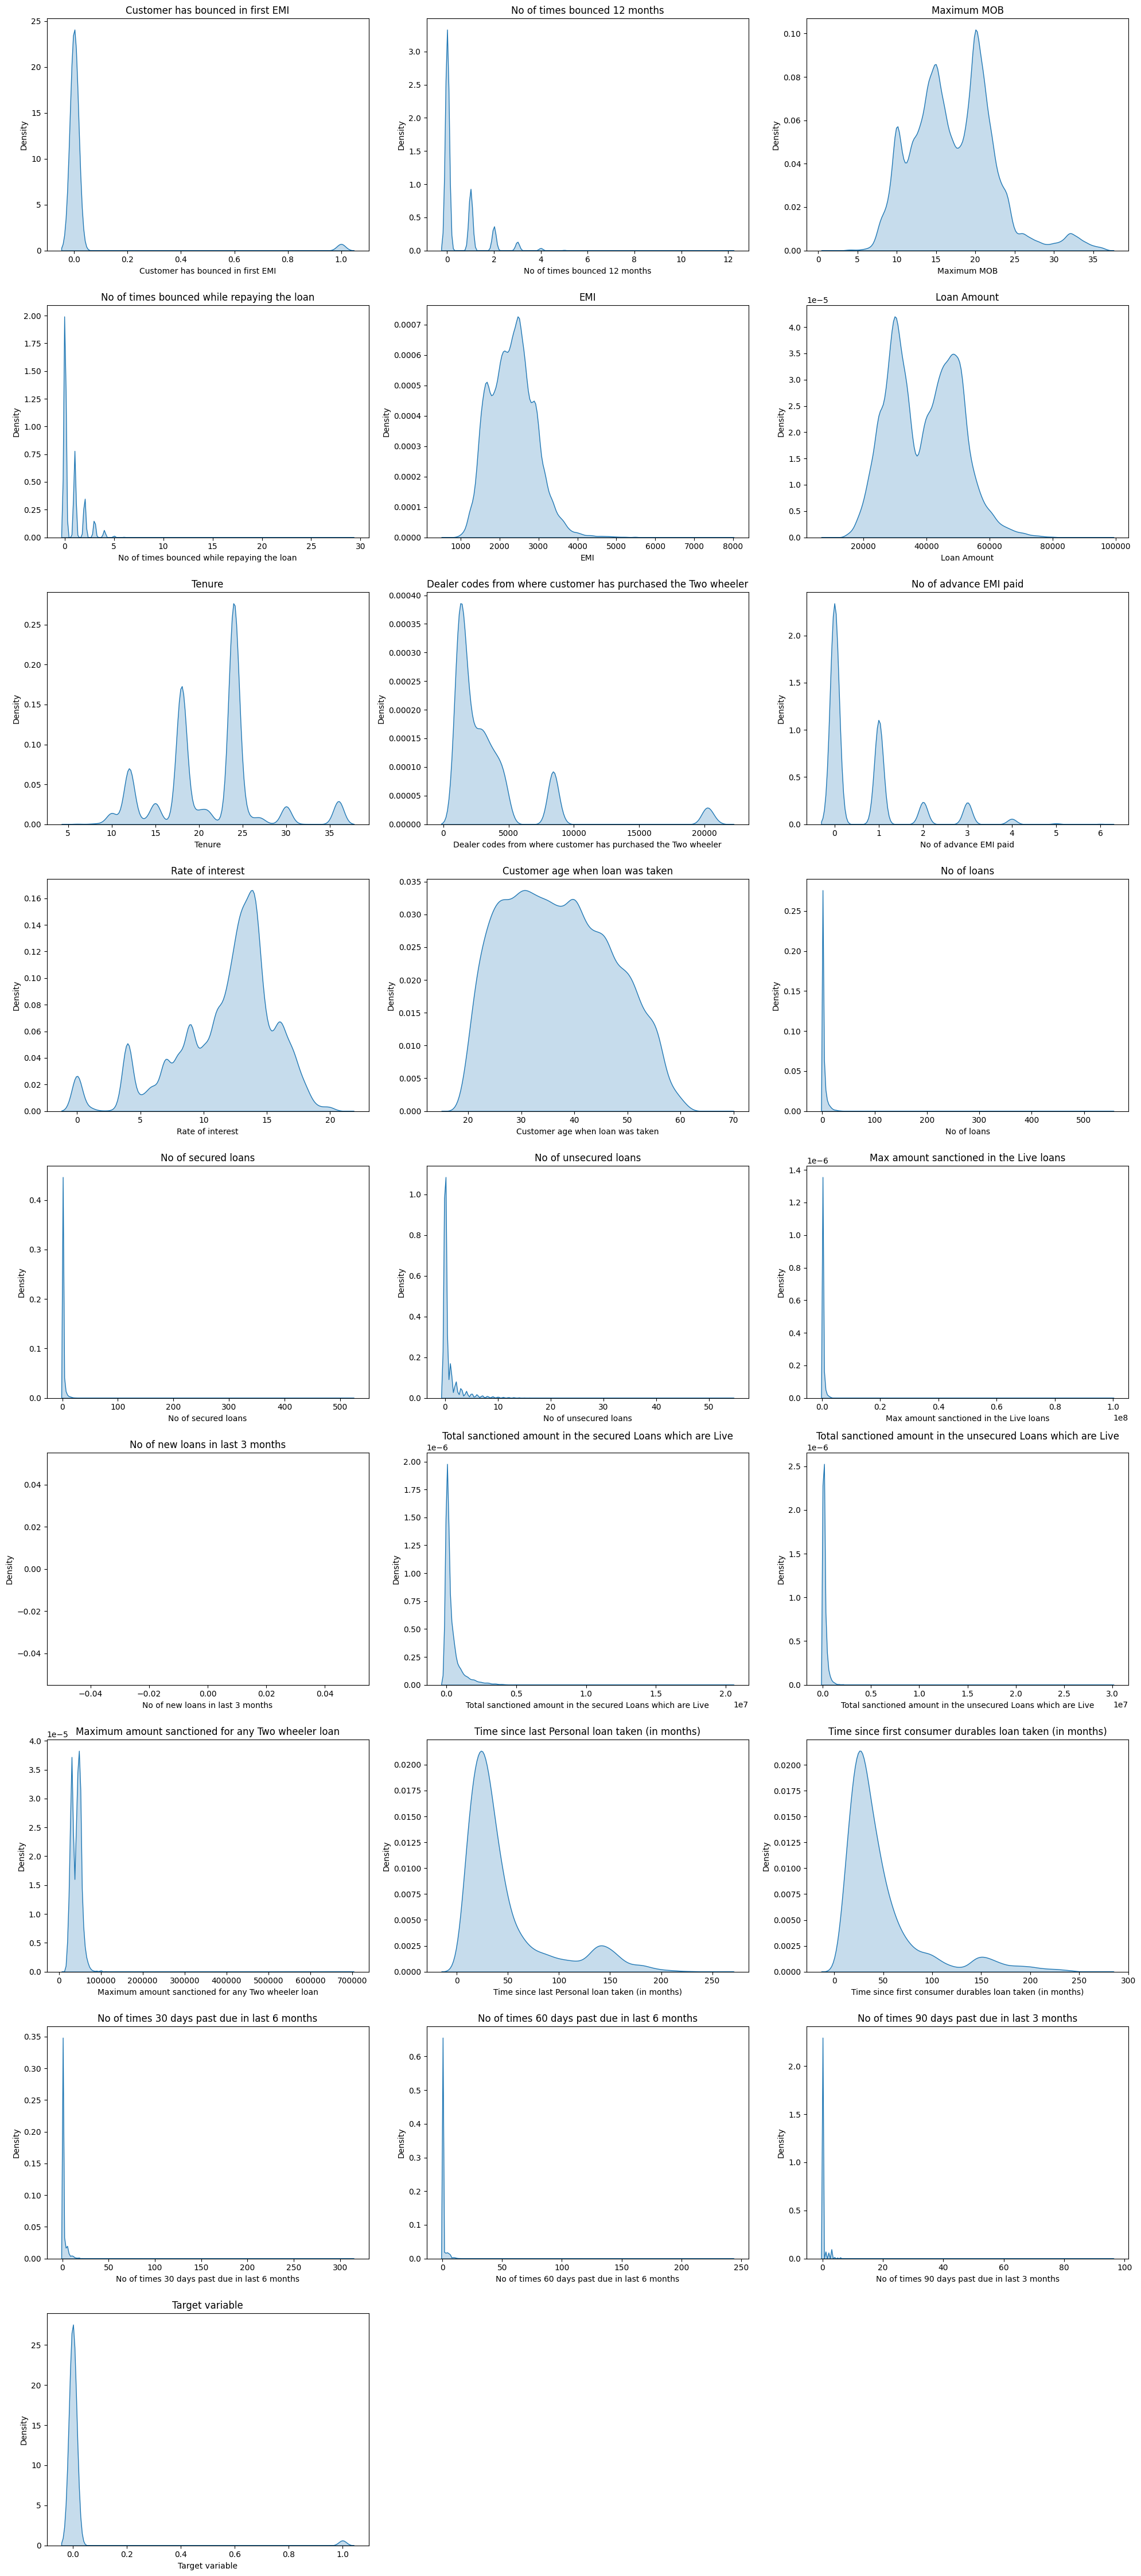

In [9]:
#Density plot
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
#fig.suptitle('Density Plots of Numeric Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot density plots
for i, col in enumerate(numeric_columns):
    ax = axes[i]
    sns.kdeplot(data=Loan_renamed[col], ax=ax, fill=True)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

# Remove any unused subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

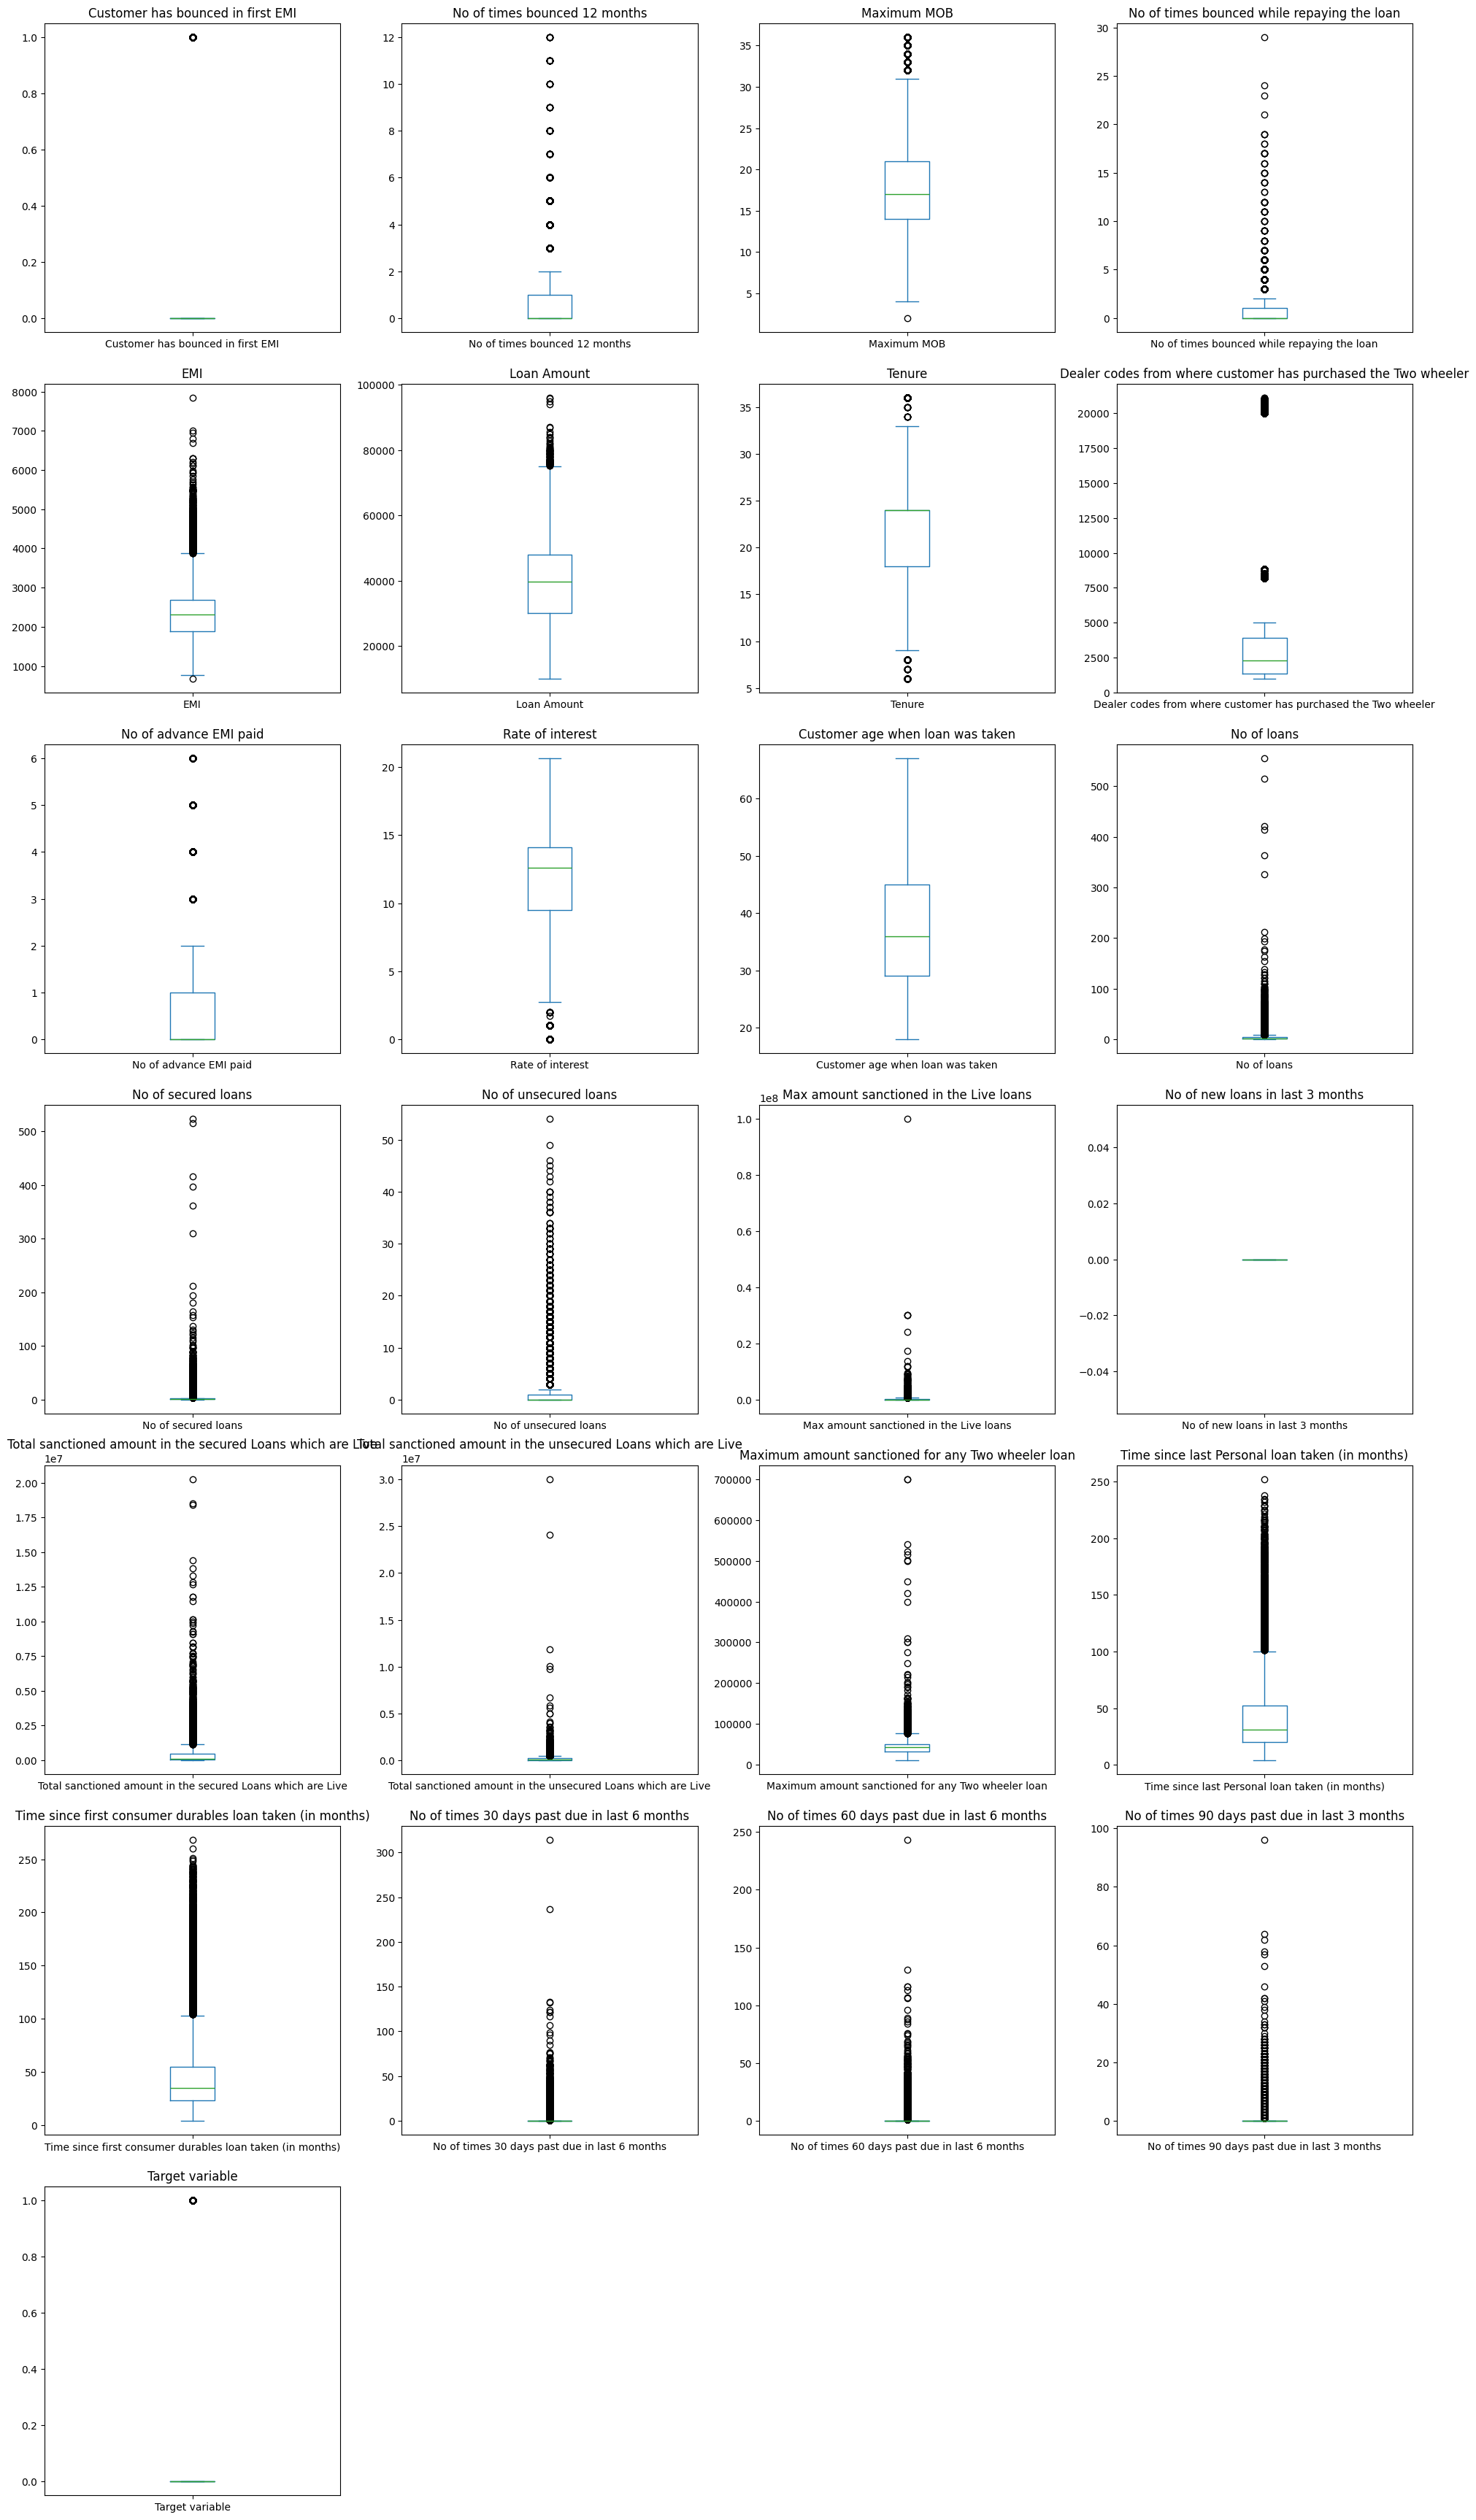

In [10]:
#Boxplots

#Number of columns and rows for the subplots
n_cols = 4  
n_plots = len(numeric_columns)
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))
fig.tight_layout(pad=3.0)

# Flatten the axes array to make indexing easier
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    Loan_renamed[column].plot(kind='box', ax=axes[i], title=column)

# Remove any unused subplots
for j in range(n_plots, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.show()

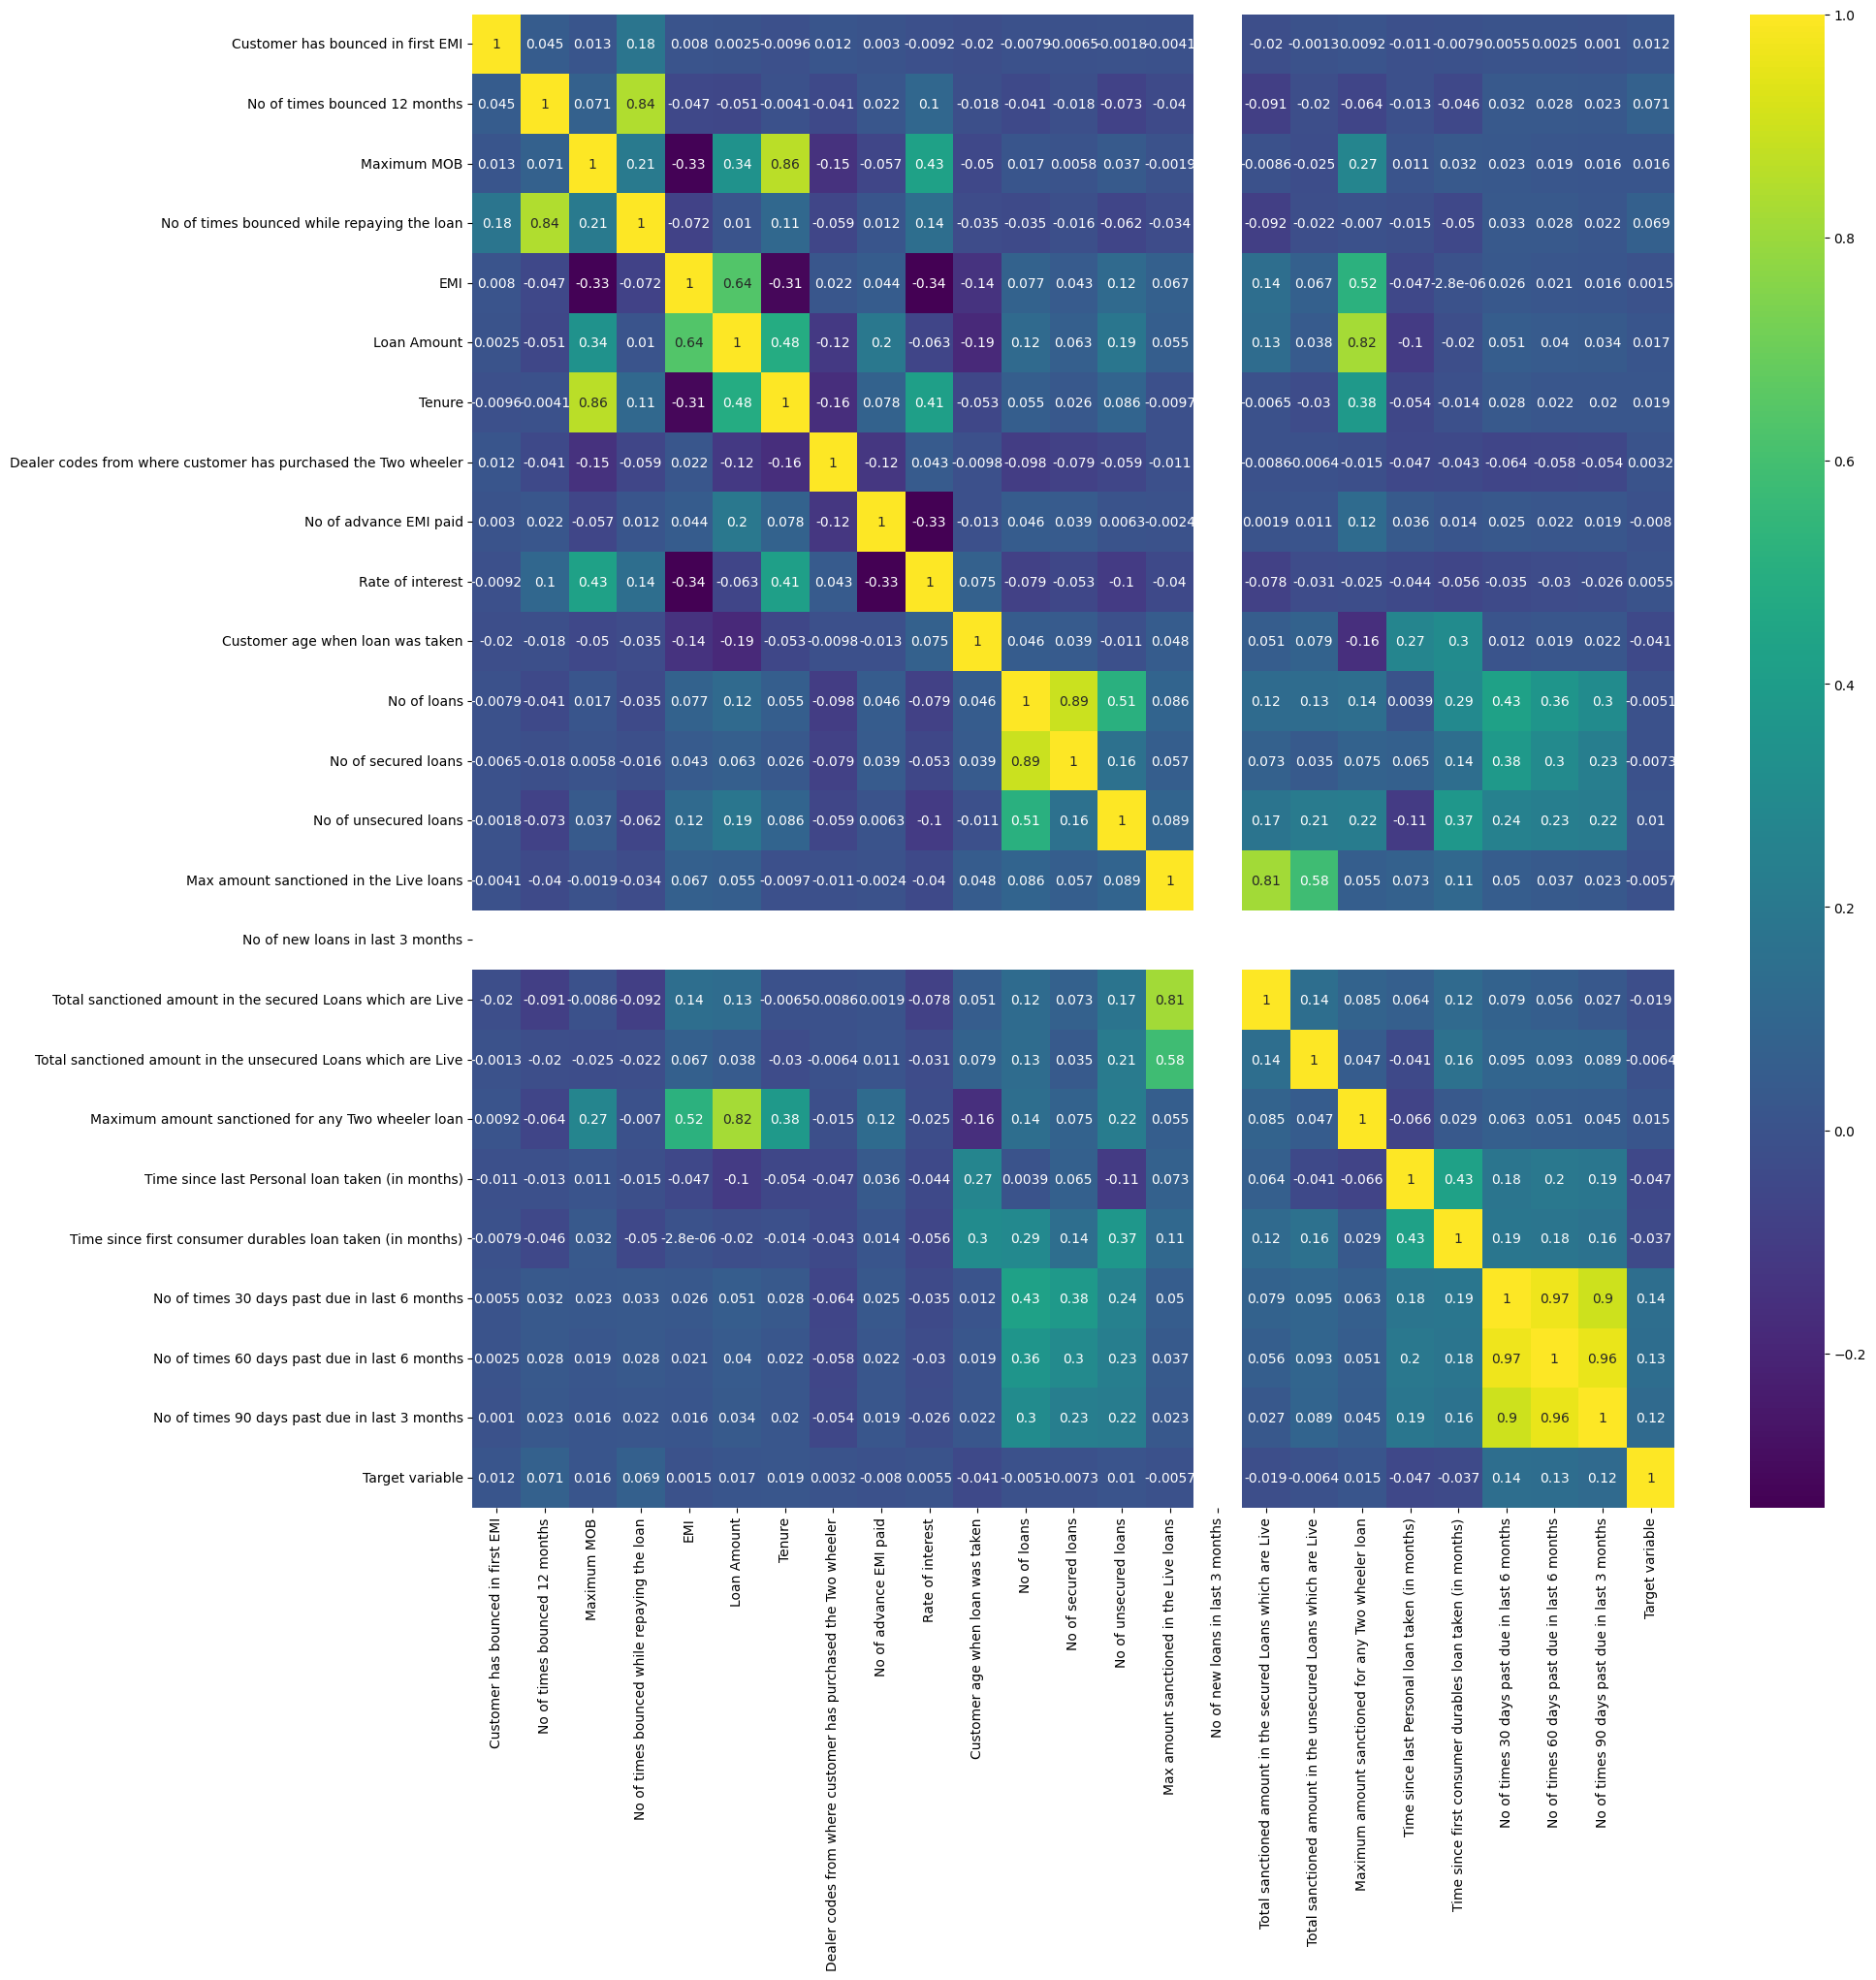

In [11]:
#Correlation Matrix

numeric_columns = Loan_renamed.select_dtypes(include=['int64', 'float64']).columns
corr_mat = Loan_renamed[numeric_columns].corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(Loan_renamed[top_corr_features].corr(),annot=True,cmap="viridis")
plt.show()

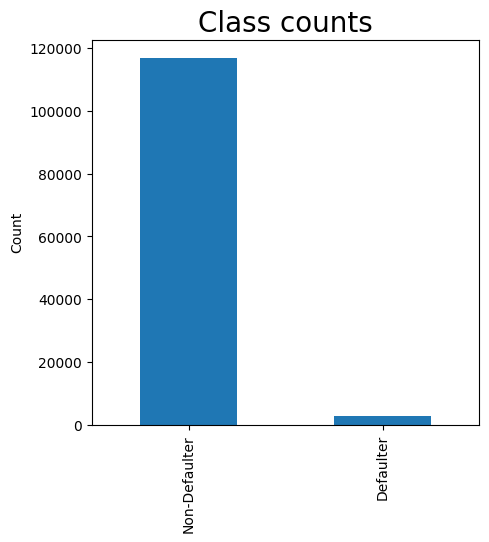

Target variable
0    116914
1      2614
Name: count, dtype: int64


In [12]:
## Getting the number of positive and negative examples. 
counts = Loan_renamed['Target variable'].value_counts()
plt.figure(figsize=(5,5))
counts.plot(kind='bar')
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20})
plt.show()

print(Loan_renamed['Target variable'].value_counts())



<Axes: title={'center': 'Loan Amount (Box Plot)'}, xlabel='Employment type', ylabel='Loan Amount'>

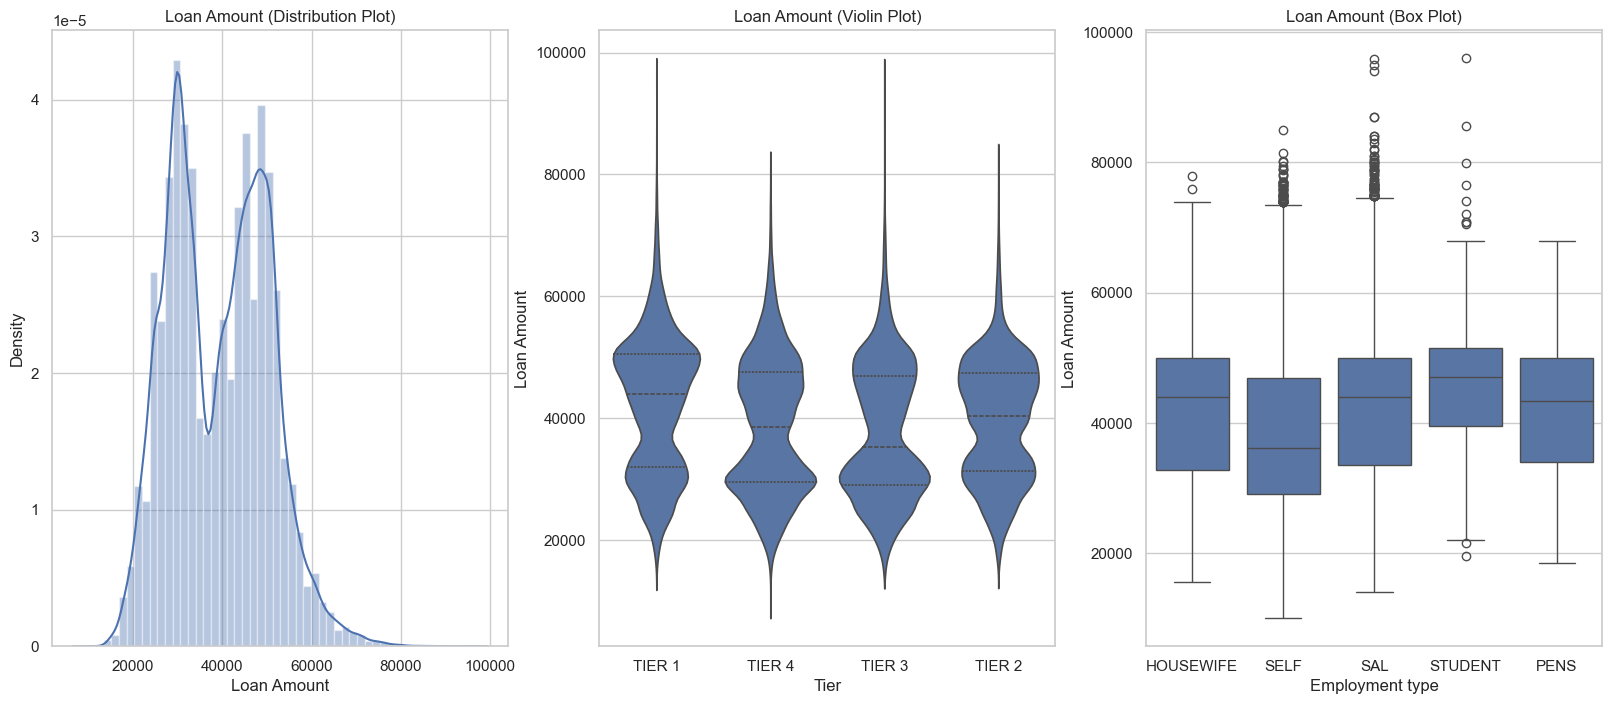

In [13]:
#Exploring the relationship of the loan amount with some features
sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Loan Amount (Distribution Plot)")
sns.distplot(Loan_renamed['Loan Amount'],ax=ax[0])
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data =Loan_renamed, x='Tier',y='Loan Amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data =Loan_renamed, x='Employment type',y='Loan Amount',ax=ax[2],orient='v')

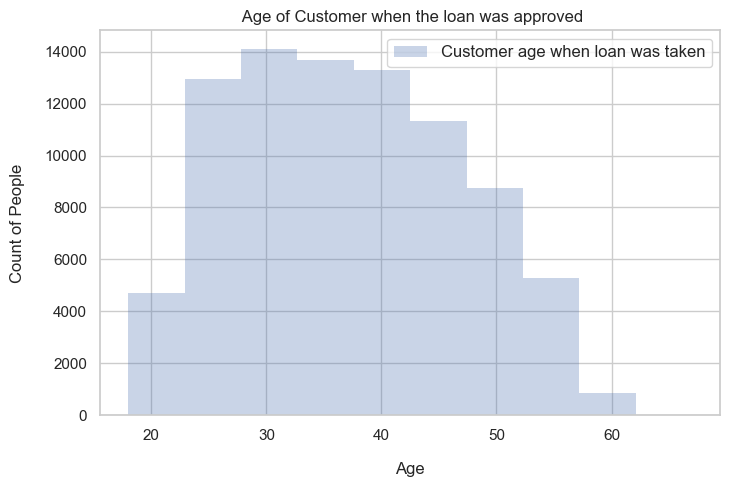

In [14]:
##Age- age at which the client took the loan
plt.figure(figsize=(8,5))

#bar plot
Loan_renamed['Customer age when loan was taken'].plot(kind='hist',color='b',alpha=0.3, edgecolor='none')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

### Age of customer when the loan was approved
- Age of customers ttaking loans range from around 20 - 30 years
- The highest number of loan approvals occurs for customers in their early 30s.
- Bulk of loan approvals is seen in customers between there late 20s and early 50s

<Axes: xlabel='Customer age when loan was taken', ylabel='Loan Amount'>

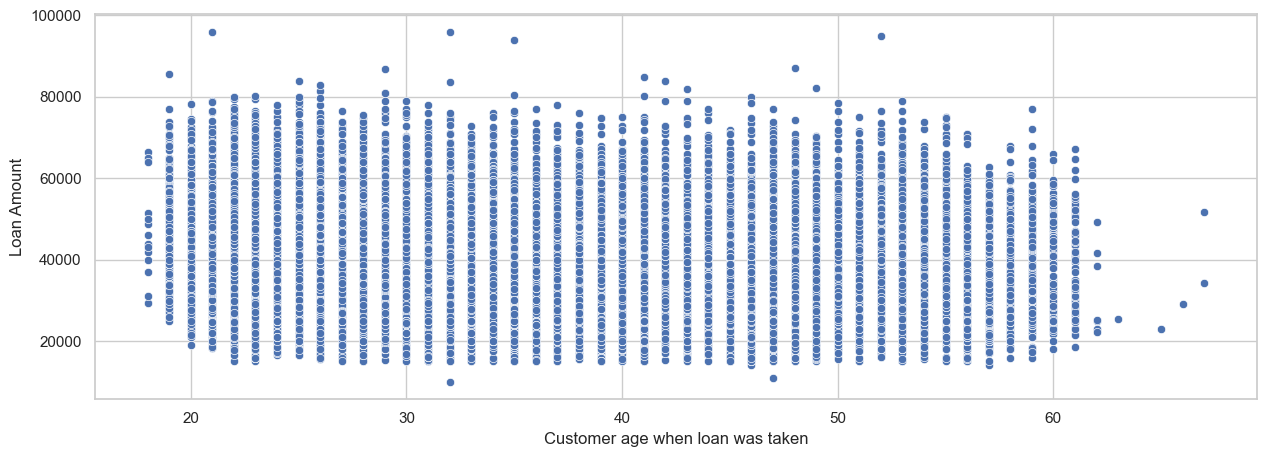

In [15]:
# Explore correlation between age and loan amount 
plt.figure(figsize=(15,5))
sns.scatterplot(x=Loan_renamed['Customer age when loan was taken'],y='Loan Amount',data=Loan_renamed)

#### Age - Loan Amount Relationship

- Customers taking loans range from approximately 20 to 65 years old
- Most loans fall between about 20,000 and 80,000 units
- Very few loans exceed 80,000, suggesting a possible lending limit for most customers
- No strong correlation between age and loan amount
- Loan amounts have high variability across all age groups, with a wide range of loan sizes for customers of any given age

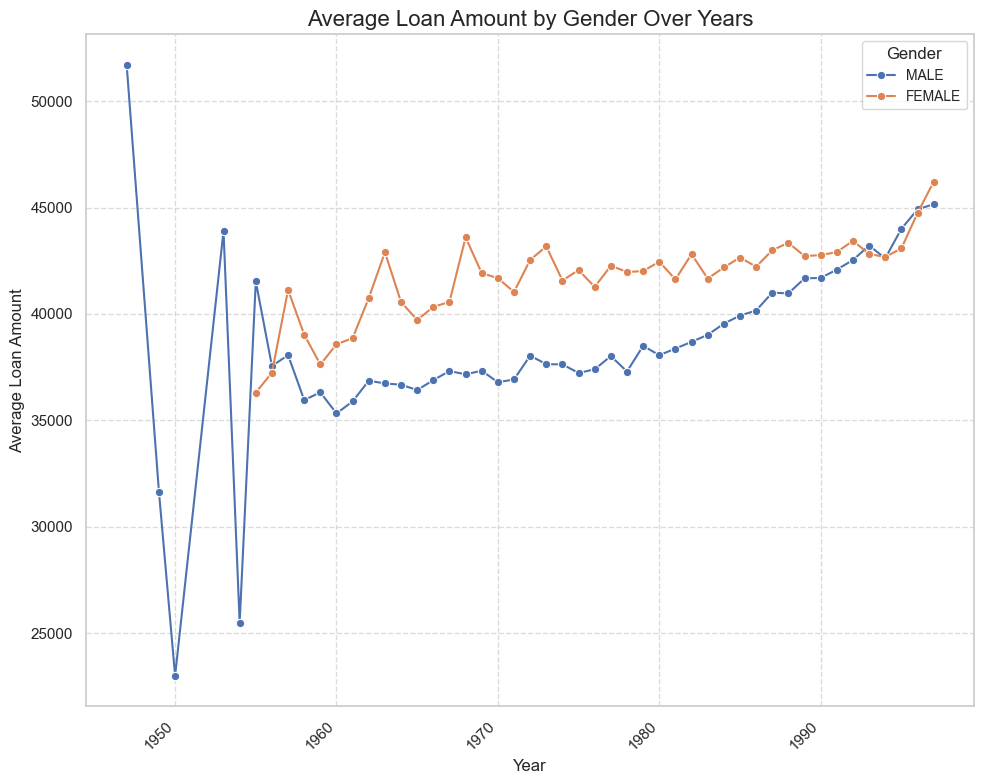

In [16]:
#Trend of amount of loan over the years based on the gender

#Extract year from 'Date of birth' column
Loan_renamed['Year'] = pd.to_datetime(Loan_renamed['Date of birth']).dt.year

#Group the data by Year and Gender, and calculate the mean Loan Amount
grouped_data = Loan_renamed.groupby(['Year', 'Gender'])['Loan Amount'].mean().reset_index()

#Create the line plot
plt.figure(figsize=(10, 8))
sns.lineplot(data=grouped_data, x='Year', y='Loan Amount', hue='Gender', marker='o')

#Customize the plot
plt.title('Average Loan Amount by Gender Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Loan Amount', fontsize=12)
plt.legend(title='Gender', title_fontsize='12', fontsize='10')

#Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

#Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

#Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Average loan amount by gender over the years
- General upward trend in loan amounts for both genders over time, with some fluctuations.
- The male loan amounts show high volatility in the early years (1950s) with no data on female loan amounts.
- Towards the most recent years (1990s), the average loan amounts for males and females seem to be converging, with the gap narrowing
- *These insights suggest changing economic conditions, evolving gender roles, and possibly shifting lending practices over the decades.



## DATA CLEANING

In [17]:
data=Loan_renamed.copy()
data.head()

,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,...,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable,Year
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,...,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0,1974.0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,...,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0,1967.0
2,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,...,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0,1983.0
3,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,...,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0,1989.0
4,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,...,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0,1984.0


#### Scaling
-Scaling using a robustscaler because most of the features have a skewed distribution

In [18]:
# Robust scaling 

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
robust_scaler = RobustScaler()
data[numeric_columns] = robust_scaler.fit_transform(data[numeric_columns])

In [19]:
data.describe()

,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable,Year
count,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,19281.000000,19028.000000,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000,85048.000000
mean,0.028378,0.473061,0.031021,0.690857,0.007180,-0.020107,-0.489992,0.474122,0.643930,-0.195250,...,0.716288,0.533826,-0.045617,0.499404,0.412780,1.076877,0.823991,0.344898,0.021869,-0.026277
std,0.166052,0.859042,0.743316,1.091658,0.724955,0.612034,0.949817,1.476475,0.969123,0.867220,...,1.840336,2.454241,0.712787,1.334882,1.303557,3.737882,3.172612,1.478180,0.146258,0.617558
min,0.000000,0.000000,-2.142857,0.000000,-2.064232,-1.650000,-3.000000,-0.513567,0.000000,-2.745098,...,-0.245809,-0.529909,-1.762295,-0.843750,-0.968750,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,0.000000,0.000000,-0.428571,0.000000,-0.535264,-0.538889,-1.000000,-0.369249,0.000000,-0.675381,...,-0.145605,-0.325534,-0.614754,-0.343750,-0.375000,0.000000,0.000000,0.000000,0.000000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.571429,1.000000,0.464736,0.461111,0.000000,0.630751,1.000000,0.324619,...,0.854395,0.674466,0.385246,0.656250,0.625000,0.000000,0.000000,0.000000,0.000000,0.500000
max,1.000000,12.000000,2.714286,29.000000,6.952141,3.127778,2.000000,7.392450,6.000000,1.753813,...,44.996131,180.123055,35.942623,6.906250,7.281250,314.000000,243.000000,96.000000,1.000000,1.125000


### Handling missingness

In [20]:
CatVariables = data.select_dtypes(include=['object'])
NumVariables = data.select_dtypes(include=['float','int'])

#standardizing column names for easier usage
data.columns=data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVariables=CatVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVariables=NumVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [21]:
#missing categorical variables
categories_missing =  data[CatVariables].isnull().mean() * 100 
categories_missing

product_code_of_two_wheeler    28.846797
gender                         28.846797
employment_type                28.846797
resident_type_of_customer      29.613982
date_of_birth                  28.846797
tier                            0.000000
dtype: float64

In [22]:
#Handle missingness  in categorical variables
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data[CatVariables] = imp_mode.fit_transform(data[CatVariables])


In [23]:
#Confirm missingness is handled in the categorical variables
categories_missing =  data[CatVariables].isnull().mean() * 100 
categories_missing


product_code_of_two_wheeler    0.0
gender                         0.0
employment_type                0.0
resident_type_of_customer      0.0
date_of_birth                  0.0
tier                           0.0
dtype: float64

In [24]:
#Missing numerical variables
num_missing = data[NumVariables].isnull().mean() * 100
num_missing

customer_has_bounced_in_first_emi                                  0.000000
no_of_times_bounced_12_months                                      0.000000
maximum_mob                                                       28.846797
no_of_times_bounced_while_repaying_the_loan                       28.846797
emi                                                               28.846797
loan_amount                                                       28.846797
tenure                                                            28.846797
dealer_codes_from_where_customer_has_purchased_the_two_wheeler    28.846797
no_of_advance_emi_paid                                            28.846797
rate_of_interest                                                  28.846797
customer_age_when_loan_was_taken                                  28.846797
no_of_loans                                                        0.000000
no_of_secured_loans                                                0.000000
no_of_unsecu

<Axes: >

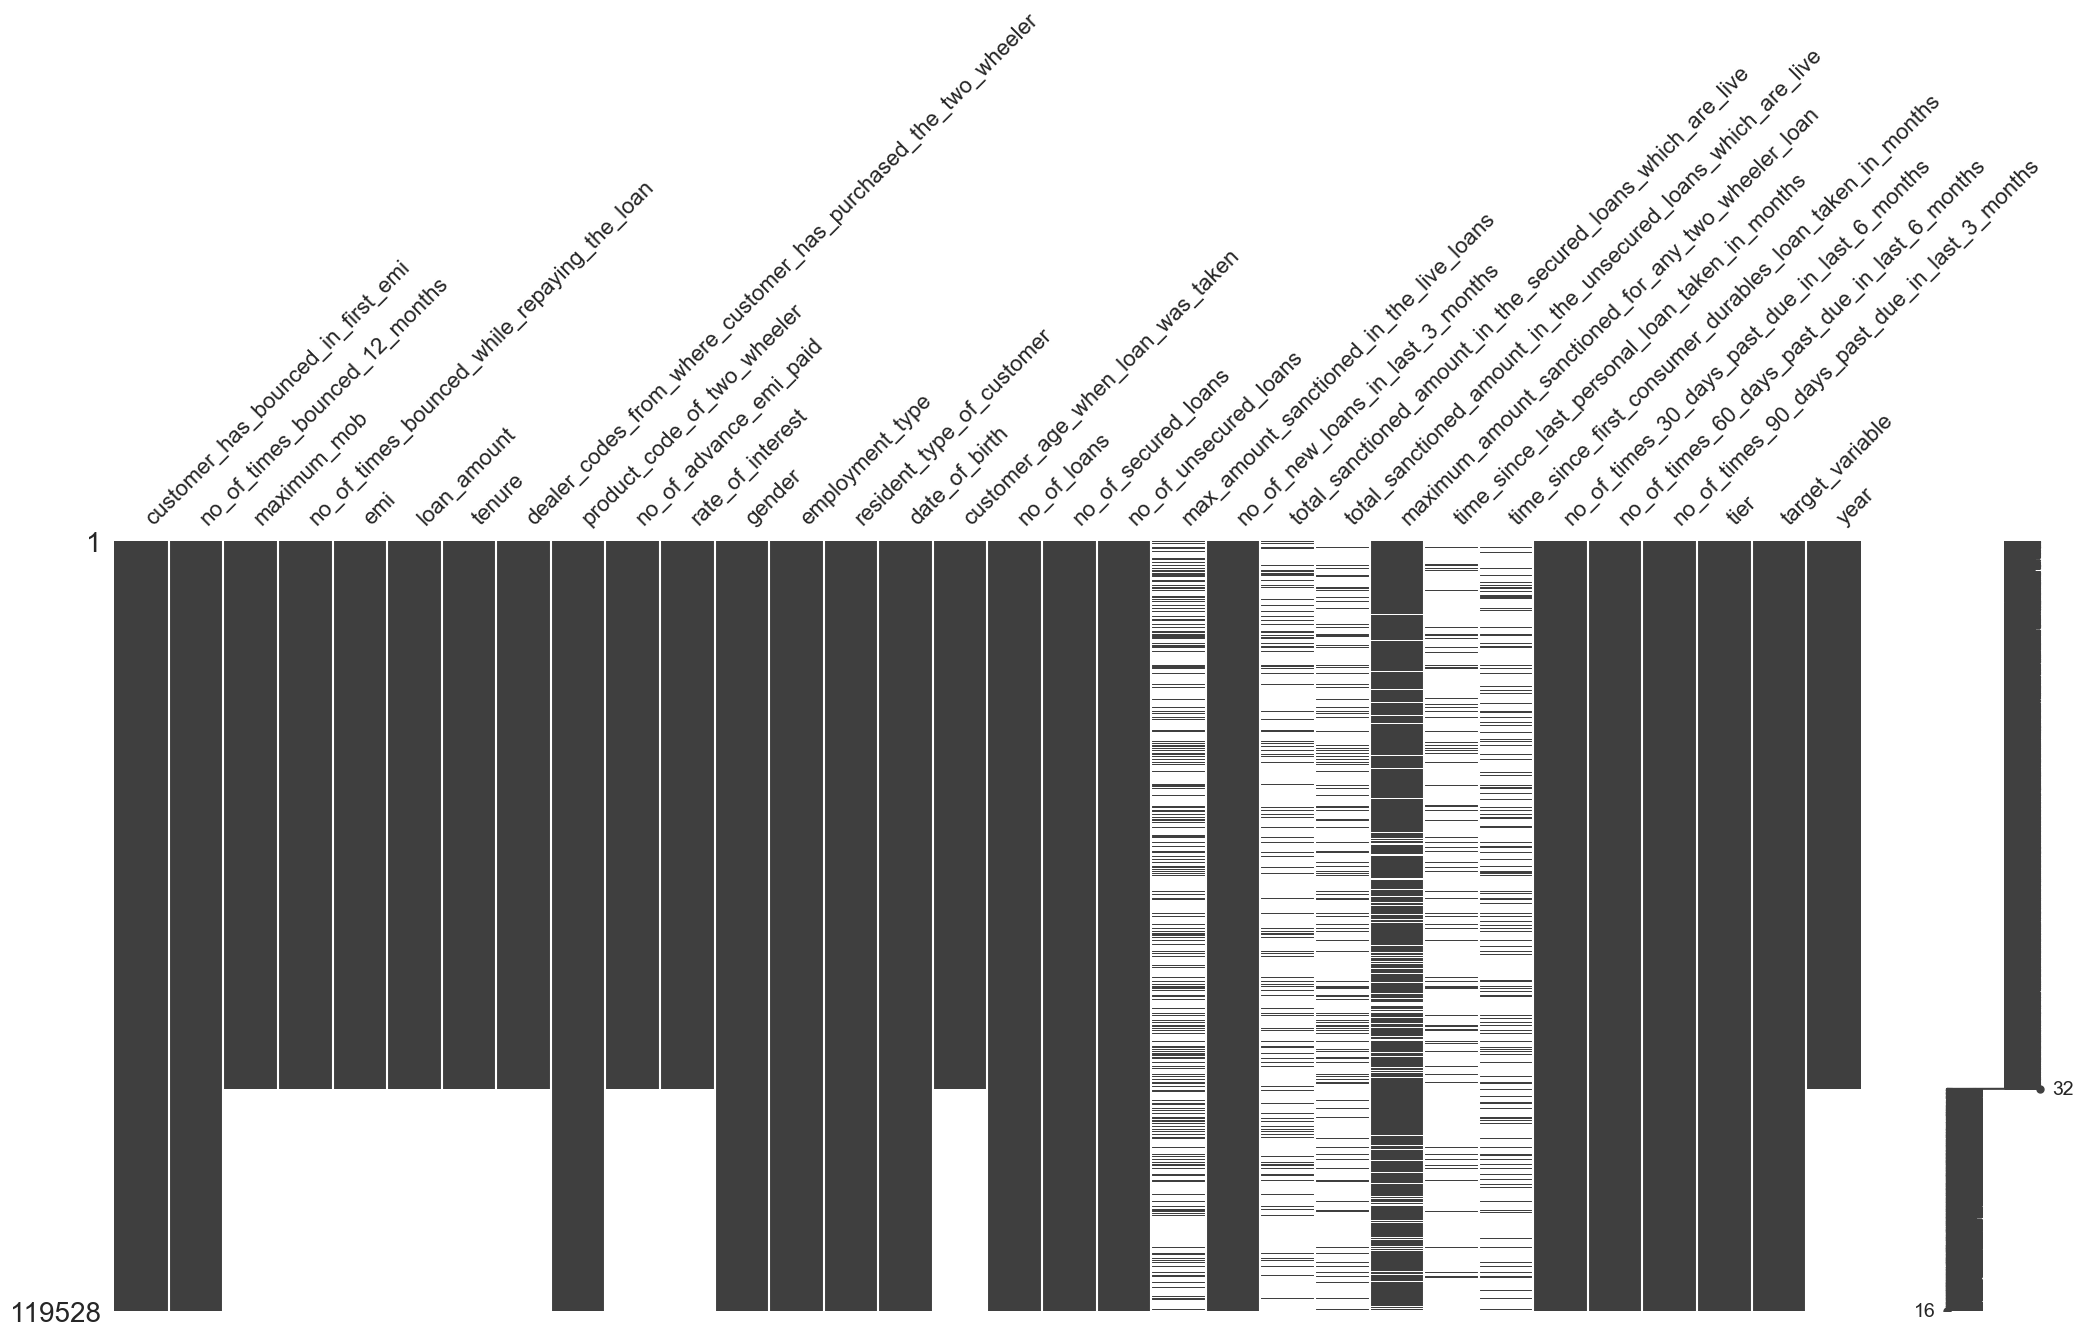

In [25]:
#Visualize the missingness
msno.matrix(data)

In [26]:
#Handle missingness  in categorical variables
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
data[NumVariables] = imp_mean.fit_transform(data[NumVariables])

### Encoding

In [27]:
# Dealing with categorical columns
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in CatVariables:
    data[feature] = le.fit_transform(data[feature].astype(str))


### Class Imbalance

In [28]:
X=data.drop(['target_variable'],axis=1)
y=data[["target_variable"]]

array([[<Axes: title={'center': 'target_variable'}>]], dtype=object)

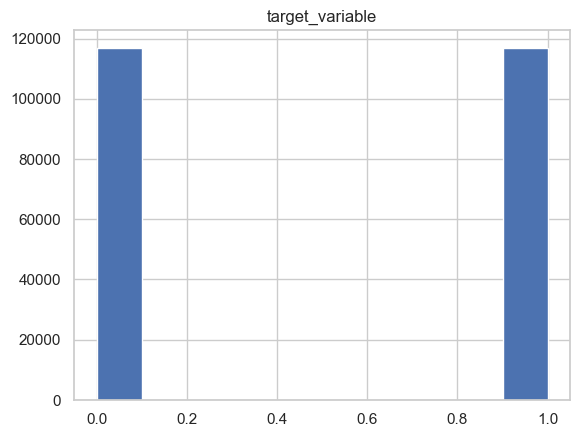

In [29]:
smote_sample=SMOTE(random_state=124,sampling_strategy='auto') 
x_res, y_res=smote_sample.fit_resample(X,y)

# Now plot the classes
y_res.hist()

In [30]:
print(x_res.shape,y_res.shape)

(233828, 31) (233828, 1)


# MODELLING

In [31]:
#Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [32]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

#### Fit different models

In [33]:
#1. Logistic Regression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1 Score: {f1_logreg}")


Logistic Regression:
Accuracy: 0.7548432621990335
Precision: 0.7910685037094133
Recall: 0.6973119877701813
F1 Score: 0.7412372762768863


In [34]:
#2. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Naive Bayes:")
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

Naive Bayes:
Accuracy: 0.6411709361501946
Precision: 0.5984350456687416
Recall: 0.8736252070151599
F1 Score: 0.7103078011980596


In [35]:
#3. DecisionTree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")



Decision Tree:
Accuracy: 0.9524013171962536
Precision: 0.9542414042861403
Recall: 0.9510807252961909
F1 Score: 0.952658443215653


In [36]:
#4. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")


Random Forest:
Accuracy: 0.9665569003121927
Precision: 0.9768773588998308
Recall: 0.9562189477260181
F1 Score: 0.9664377682403433


In [37]:
# Create a DataFrame to store the evaluation metrics
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_logreg, accuracy_nb, accuracy_dt, accuracy_rf],
    'Precision': [precision_logreg, precision_nb, precision_dt, precision_rf],
    'Recall': [recall_logreg, recall_nb, recall_dt, recall_rf],
    'F1 Score': [f1_logreg, f1_nb, f1_dt, f1_rf]
})

# Display the results
print(results)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.754843   0.791069  0.697312  0.741237
1          Naive Bayes  0.641171   0.598435  0.873625  0.710308
2        Decision Tree  0.952401   0.954241  0.951081  0.952658
3        Random Forest  0.966557   0.976877  0.956219  0.966438
